<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/Custom_Model_Training_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


# Tensor Calculation

In [2]:
print(tf.constant([[1., 2., 3.], [4., 5., 6.]]))
print(tf.constant(42))
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
print(t.shape)
print(t.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
tf.Tensor(42, shape=(), dtype=int32)
(2, 3)
<dtype: 'float32'>


In [3]:
print(t[:, 1:])
print(t[..., 1, tf.newaxis])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2.]
 [5.]], shape=(2, 1), dtype=float32)


In [4]:
print(t + 10) #print(tf.add(t, 10))
print(tf.square(t))
print(t @ tf.transpose(t))


tf.Tensor(
[[11. 12. 13.]
 [14. 15. 16.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[ 1.  4.  9.]
 [16. 25. 36.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[14. 32.]
 [32. 77.]], shape=(2, 2), dtype=float32)


In [5]:
n = np.array([2., 3., 4.])
print(tf.constant(n))
print(t.numpy())
print(tf.square(n))
print(np.square(t))


tf.Tensor([2. 3. 4.], shape=(3,), dtype=float64)
[[1. 2. 3.]
 [4. 5. 6.]]
tf.Tensor([ 4.  9. 16.], shape=(3,), dtype=float64)
[[ 1.  4.  9.]
 [16. 25. 36.]]


In [6]:
try:
    tf.constant(2.) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [7]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

# Variable

In [8]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>


In [9]:
print(v)
v.assign(v * 2)
print(v)
v[0, 1].assign(42)
print(v)
v[:, 2].assign([0., 1.])
print(v)
v.scatter_nd_update(indices=[[0, 0], [1,2]], updates=[100., 200.])
print(v)



<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>


# String

In [10]:
#byte code
s = tf.constant(b"hello world")
print(s)
#unicode
us = tf.constant("카페")
print(us)
#unicode to int32
u = tf.constant([ord(c) for c in "카페"])
print(u)
#int32 to unicode encode , same as tf.constant("카페")
b = tf.strings.unicode_encode(u, "UTF-8")
print(b)
#unicode decode to int32 , same as u
du = tf.strings.unicode_decode(b, "UTF-8")
print(du)

tf.Tensor(b'hello world', shape=(), dtype=string)
tf.Tensor(b'\xec\xb9\xb4\xed\x8e\x98', shape=(), dtype=string)
tf.Tensor([52852 54168], shape=(2,), dtype=int32)
tf.Tensor(b'\xec\xb9\xb4\xed\x8e\x98', shape=(), dtype=string)
tf.Tensor([52852 54168], shape=(2,), dtype=int32)


# String Array, Ragged Tensor

In [11]:
#string tensor array
p = tf.constant(["카페", "Coffee", "caffè", "咖啡"])
print(p)
#int32 decode string ragged tensor
r = tf.strings.unicode_decode(p, "UTF8")
print(r)
t = r.to_tensor()
print(t)

tf.Tensor(
[b'\xec\xb9\xb4\xed\x8e\x98' b'Coffee' b'caff\xc3\xa8'
 b'\xe5\x92\x96\xe5\x95\xa1'], shape=(4,), dtype=string)
<tf.RaggedTensor [[52852, 54168], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>
tf.Tensor(
[[52852 54168     0     0     0     0]
 [   67   111   102   102   101   101]
 [   99    97   102   102   232     0]
 [21654 21857     0     0     0     0]], shape=(4, 6), dtype=int32)


# Sparse Tensor

In [12]:
#sparse tensor
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[5, 4])
print("-- sparse tensor\n", s)
#sparse to dense tensor
ds = tf.sparse.to_dense(s)
print("-- sparse to dense tensor\n" , ds)
#sparse matmul dense
ms = tf.sparse.sparse_dense_matmul(s, tf.transpose(ds))
print("-- matmul sparse, dense tensor\n", ms)
#indices reorder
print("-- reorder")
rs = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(rs)
try:
    tf.sparse.to_dense(rs)
except tf.errors.InvalidArgumentError as ex:
    print(ex)
    rs = tf.sparse.reorder(rs)
    print(rs)
    print(tf.sparse.to_dense(rs))

-- sparse tensor
 SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([5 4], shape=(2,), dtype=int64))
-- sparse to dense tensor
 tf.Tensor(
[[0. 1. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 3.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(5, 4), dtype=float32)
-- matmul sparse, dense tensor
 tf.Tensor(
[[1. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0.]
 [0. 0. 9. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]], shape=(5, 5), dtype=float32)
-- reorder
SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))
indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]
SparseTensor(indices=tf.Tensor(
[[0 1]
 [0 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([2. 1.], shape=(2,), dtype=fl

# Set

In [13]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
print(set1, set2, sep='\n')
#{2,3,7}, {7}
difs = tf.sets.difference(set1, set2)
print(difs)
ds = tf.sparse.to_dense(difs)
print(ds)


tf.Tensor(
[[2 3 5 7]
 [7 9 0 0]], shape=(2, 4), dtype=int32)
tf.Tensor(
[[ 4  5  6]
 [ 9 10  0]], shape=(2, 3), dtype=int32)
SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [0 2]
 [1 0]], shape=(4, 2), dtype=int64), values=tf.Tensor([2 3 7 7], shape=(4,), dtype=int32), dense_shape=tf.Tensor([2 3], shape=(2,), dtype=int64))
tf.Tensor(
[[2 3 7]
 [7 0 0]], shape=(2, 3), dtype=int32)


# User Define Loss Function


In [14]:
#데이터 준비
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

#모델 생성
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

mse_model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])


In [15]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])
mse_model.compile(loss="mse", optimizer='nadam', metrics=["mse"])

In [16]:
history = model.fit(X_train_scaled, y_train, epochs=10,
          validation_data=(X_valid_scaled, y_valid))
mse_history = mse_model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 0.5584 - mae: 0.9107 - val_loss: 0.2605 - val_mae: 0.5542
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.2128 - mae: 0.5051 - val_loss: 0.2000 - val_mae: 0.4817
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.1967 - mae: 0.4833 - val_loss: 0.1907 - val_mae: 0.4713
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.1924 - mae: 0.4781 - val_loss: 0.1887 - val_mae: 0.4677
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.1897 - mae: 0.4732 - val_loss: 0.1924 - val_mae: 0.4697
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.1878 - mae: 0.4704 - val_loss: 0.1831 - val_mae: 0.4580
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.1852 - mae: 0.4666 - val_loss: 0.1757 - val_mae: 0.4505
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.

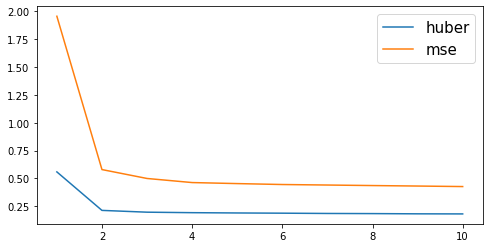

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(list(range(1, 11)), history.history['loss'], label='huber')
plt.plot(list(range(1, 11)), mse_history.history['loss'], label='mse')
plt.legend(fontsize=15)
plt.show()

# User Define Model Save And Load

In [18]:
#저장 - 문제없음
model.save("custom_loss_regressor_model.h5")
#로드 - 맵핑 필요
try:
    model = keras.models.load_model("custom_loss_regressor_model.h5")
except ValueError as ex:
    print(ex)
    model = keras.models.load_model("custom_loss_regressor_model.h5", custom_objects={"huber_fn": huber_fn})

Unknown loss function: huber_fn. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [19]:
#매개변수 지정 사용자 정의 함수
def create_huber_loss(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

model.compile(loss=create_huber_loss(2.), optimizer='nadam', metrics=['mse'])

In [41]:
#keras.losses.Loss 상속후 사용자 로스함수 정의
#get_config 에 추가해서 매개변수 지정
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold ** 2 / 2 
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        #언패킹 연산자 * , 딕셔너리 언패킹 연산자 **
        return {**base_config, "threshold": self.threshold}

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=HuberLoss(2.), optimizer='nadam', metrics=['mse'])

In [42]:
history = model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.6912 - mse: 1.8845 - val_loss: 0.5031 - val_mse: 27.8837
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2526 - mse: 0.7427 - val_loss: 0.4098 - val_mse: 14.3238


In [43]:
print(model.loss.threshold)
print(model.optimizer.learning_rate)
model = keras.models.load_model('custom_loss_regressor_model.h5', custom_objects={'huber_fn' : HuberLoss})

2.0
<tf.Variable 'Nadam/learning_rate:0' shape=() dtype=float32, numpy=0.001>


#User_Define_Activation_Initialization_Regularization_Constraint

In [46]:
#활성화함수
def custom_softplus(z):
    return tf.math.log(tf.exp(z) + 1.0)

#가중치 초기화 함수
def custom_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

#규제 함수
def custom_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

#가중치 제한 함수
def custom_positive_weights(weights):
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [47]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

layer = keras.layers.Dense(30, activation=custom_softplus,
                           kernel_initializer=custom_glorot_initializer,
                           kernel_regularizer=custom_l1_regularizer,
                           kernel_constraint=custom_positive_weights
                           )

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    layer,
])
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [48]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 2.4459 - mae: 1.0051 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 1.3113 - mae: 0.5760 - val_loss: inf - val_mae: inf


In [49]:
#커스텀 함수 저장 및 로드 (파라미터 없을 경우)
model.save("custom_model.h5")

model = keras.models.load_model(
    "custom_model.h5",
    custom_objects={
       "custom_l1_regularizer": custom_l1_regularizer,
       "custom_positive_weights": custom_positive_weights,
       "custom_glorot_initializer": custom_glorot_initializer,
       "custom_softplus": custom_softplus,
    })

In [53]:
#파라미터를 모델에 저장하기 위한 클래스 상속
class CustomL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}


keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=custom_softplus,
                       kernel_regularizer=CustomL1Regularizer(0.01),
                       kernel_constraint=custom_positive_weights,
                       kernel_initializer=custom_glorot_initializer),
])
model.compile(loss='mse', optimizer='nadam', metrics=['mse'])

In [55]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 1.5542 - mse: 1.5178 - val_loss: 1.4154 - val_mse: 1.3718
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5943 - mse: 0.5514 - val_loss: 1.4399 - val_mse: 1.3976


In [76]:
model.save("custom_params_saved_model.h5")
model = keras.models.load_model(
    "custom_params_saved_model.h5",
    custom_objects={
       "CustomL1Regularizer": CustomL1Regularizer,
       "custom_positive_weights": custom_positive_weights,
       "custom_glorot_initializer": custom_glorot_initializer,
       "custom_softplus": custom_softplus,
    })
print(*model.get_config()['layers'][2]['config'].items(), sep='\n')

('name', 'dense_1')
('trainable', True)
('dtype', 'float32')
('units', 1)
('activation', 'custom_softplus')
('use_bias', True)
('kernel_initializer', 'custom_glorot_initializer')
('bias_initializer', {'class_name': 'Zeros', 'config': {}})
('kernel_regularizer', {'class_name': 'CustomL1Regularizer', 'config': {'factor': 0.01}})
('bias_regularizer', None)
('activity_regularizer', None)
('kernel_constraint', 'custom_positive_weights')
('bias_constraint', None)


# User_Define_Metrics

In [115]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

#사용자 정의 스트리밍 지표
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.huber_fn = create_huber_loss(self.threshold)
        #변수 생성 메서드
        self.total = self.add_weight("total", initializer='zeros')
        self.count = self.add_weight("count", initializer='zeros')
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}
    

In [119]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss='mse', optimizer='nadam', metrics=[HuberMetric(2.)])

class MetricPrint(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        huberMetric = self.model.metrics[-1]
        print()
        print("-"*30)
        print(*huberMetric.variables)
        print(huberMetric.result())
        print("-"*30)

metric_cb = MetricPrint()

In [117]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2, callbacks=[metric_cb])

Epoch 1/2
357/363 [============================>.] - ETA: 0s - loss: 2.1212 - huber_metric: 0.9287
------------------------------
<tf.Variable 'total:0' shape=() dtype=float32, numpy=10671.655> <tf.Variable 'count:0' shape=() dtype=float32, numpy=11610.0>
tf.Tensor(0.9191779, shape=(), dtype=float32)
------------------------------
363/363 [==============================] - 1s 2ms/step - loss: 2.0982 - huber_metric: 0.9192
Epoch 2/2
359/363 [============================>.] - ETA: 0s - loss: 0.6059 - huber_metric: 0.2734
------------------------------
<tf.Variable 'total:0' shape=() dtype=float32, numpy=3173.1255> <tf.Variable 'count:0' shape=() dtype=float32, numpy=11610.0>
tf.Tensor(0.27330968, shape=(), dtype=float32)
------------------------------
363/363 [==============================] - 1s 2ms/step - loss: 0.6052 - huber_metric: 0.2733


# User_Define_Layer

In [127]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

def exp(x):
    return tf.exp(x)
exponential_layer = keras.layers.Lambda(exp)
print(exponential_layer([-1., 0., 1.]))
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))
print(exponential_layer([-1., 0., 1.]))

tf.Tensor([0.36787945 1.         2.7182817 ], shape=(3,), dtype=float32)
tf.Tensor([0.36787945 1.         2.7182817 ], shape=(3,), dtype=float32)


In [140]:
#Dense 레이어 구현해보기
class CustomDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)
    
    def build(self, batch_input_shape):
        self.kernel = self.add_weight( name="kernel", shape=[batch_input_shape[-1], self.units], initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end


    def call(self, X):
        self.activation(X @ self.kernel + self.bias)
    
    def compute_output_shape(self, batch_input_shape):
        print(batch_input_shape)
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        #활성화 함수의 전체 설정 저장을 위한 serialize
        return {**base_config, "units" : self.units, "activation": keras.activations.serialize(self.activation)}


model = keras.models.Sequential([
    CustomDense(30, activation="relu", input_shape=input_shape),
    CustomDense(1)
])

model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

TypeError: ignored

In [ ]:
#여러개의 입력과 여러개의 출력을 반환하는 사용자 정의층
class MultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return [X1 + X2, X1 * X2, X1 / X2]
    def compute_output_shape(self, batch_input_shape):
        b1, b2 = batch_input_shape
        return [b1, b1, b1]

